In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# custom functions
from functions import *

/home/michael/.pyenv/versions/3.12.6/envs/funnypress-data-study/lib/python3.12/site-packages/numba/np/ufunc/dufunc.py:343: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, errors.NumbaWarning)
/home/michael/.pyenv/versions/3.12.6/envs/funnypress-data-study/lib/python3.12/site-packages/numba/np/ufunc/dufunc.py:343: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, errors.NumbaWarning)
/home/michael/.pyenv/versions/3.12.6/envs/funnypress-data-study/lib/python3.12/site-packages/numba/np/ufunc/dufunc.py:343: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indi

In [2]:
df = pd.read_csv('../data/clean/dataset.csv').fillna('').sample(frac=1).reset_index(drop=True)

In [3]:
df

name                                                url  \
0           le_monde  https://www.lemonde.fr/societe/article/2024/08...   
1         la_depeche  https://www.ladepeche.fr/2024/10/04/un-gouter-...   
2       franceinfotv  https://www.francetvinfo.fr/monde/afghanistan/...   
3       franceinfotv  https://www.francetvinfo.fr/monde/royaume-uni/...   
4        le_parisien  https://www.leparisien.fr/sports/cyclisme/jai-...   
...              ...                                                ...   
102080    liberation  https://www.liberation.fr/societe/apres-une-cy...   
102081      le_monde  https://www.lemonde.fr/m-le-mag/article/2024/0...   
102082   le_parisien  https://www.leparisien.fr/sports/football/ligu...   
102083    la_depeche  https://www.ladepeche.fr/2024/10/02/cinquiemes...   
102084   le_parisien  https://www.leparisien.fr/aube-10/aube-tintin-...   

                                                    title  \
0       Pour la rentrée scolaire, Bordeaux présente un...   
1                           Un goûter sur la biodiversité   
2       Statut de réfugié pour les femmes afghanes : l...   
3       REPORTAGE. "C'est la pire expérience de notre ...   
4       « J’ai été un peu méchant parfois » : Patri...   
...                                                   ...   
102080  Après une cyberattaque contre l’enseigne Boula...   
102081  A Montpellier, la vie en mosaïques de madame e...   
102082  Entre Kylian Mbappé et le PSG, le bras de fer...   
102083               Cinquièmes journées de l’archéologie   
102084  Tintin enfin traduit en champenois grâce à l...   

                                                   lemmes  funny  
0       rentree scolaire bordeaux presente kit fournit...      0  
1                                     gouter biodiversite      0  
2       statut refugie femme afghan decision cour just...      0  
3       reportage pire experience vie middlesbrough vi...      0  
4       ete mechant patrick lefevere reagit depart jul...      0  
...                                                   ...    ...  
102080  cyberattaque contre enseigne boulanger centain...      0  
102081  montpellier vie mosaique monsieur monsieur pom...      0  
102082                   kylian mbappe psg bras fer lance      0  
102083                     cinquiemer journer archeologie      0  
102084  tintin traduire champenois grace maison folklo...      0  

[102085 rows x 5 columns]

In [4]:
X = CountVectorizer().fit_transform(df.lemmes)

In [5]:
X.shape

(102085, 47545)

In [6]:
X = CountVectorizer(min_df=100).fit_transform(df.lemmes)

In [7]:
X.shape

(102085, 1512)

In [8]:
X.toarray().shape

(102085, 1512)

In [9]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

<Figure size 800x600 with 0 Axes>

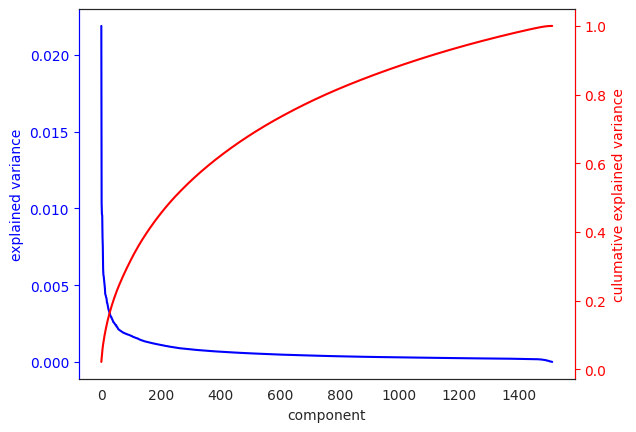

In [10]:
pca_graph(X.toarray())

In [11]:
y = df.funny

In [12]:
mapper = umap.UMAP(n_components=2, n_jobs=-1, verbose=1).fit(X)    

UMAP( verbose=1)
Mon Nov 11 01:41:56 2024 Construct fuzzy simplicial set
Mon Nov 11 01:41:56 2024 Finding Nearest Neighbors
Mon Nov 11 01:41:56 2024 Building RP forest with 21 trees
Mon Nov 11 01:42:06 2024 metric NN descent for 17 iterations
	 1  /  17
	 2  /  17
	 3  /  17
	 4  /  17
	 5  /  17
	 6  /  17
	Stopping threshold met -- exiting after 6 iterations
Mon Nov 11 01:42:26 2024 Finished Nearest Neighbor Search
Mon Nov 11 01:42:28 2024 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon Nov 11 01:42:55 2024 Finished embedding


<Axes: >

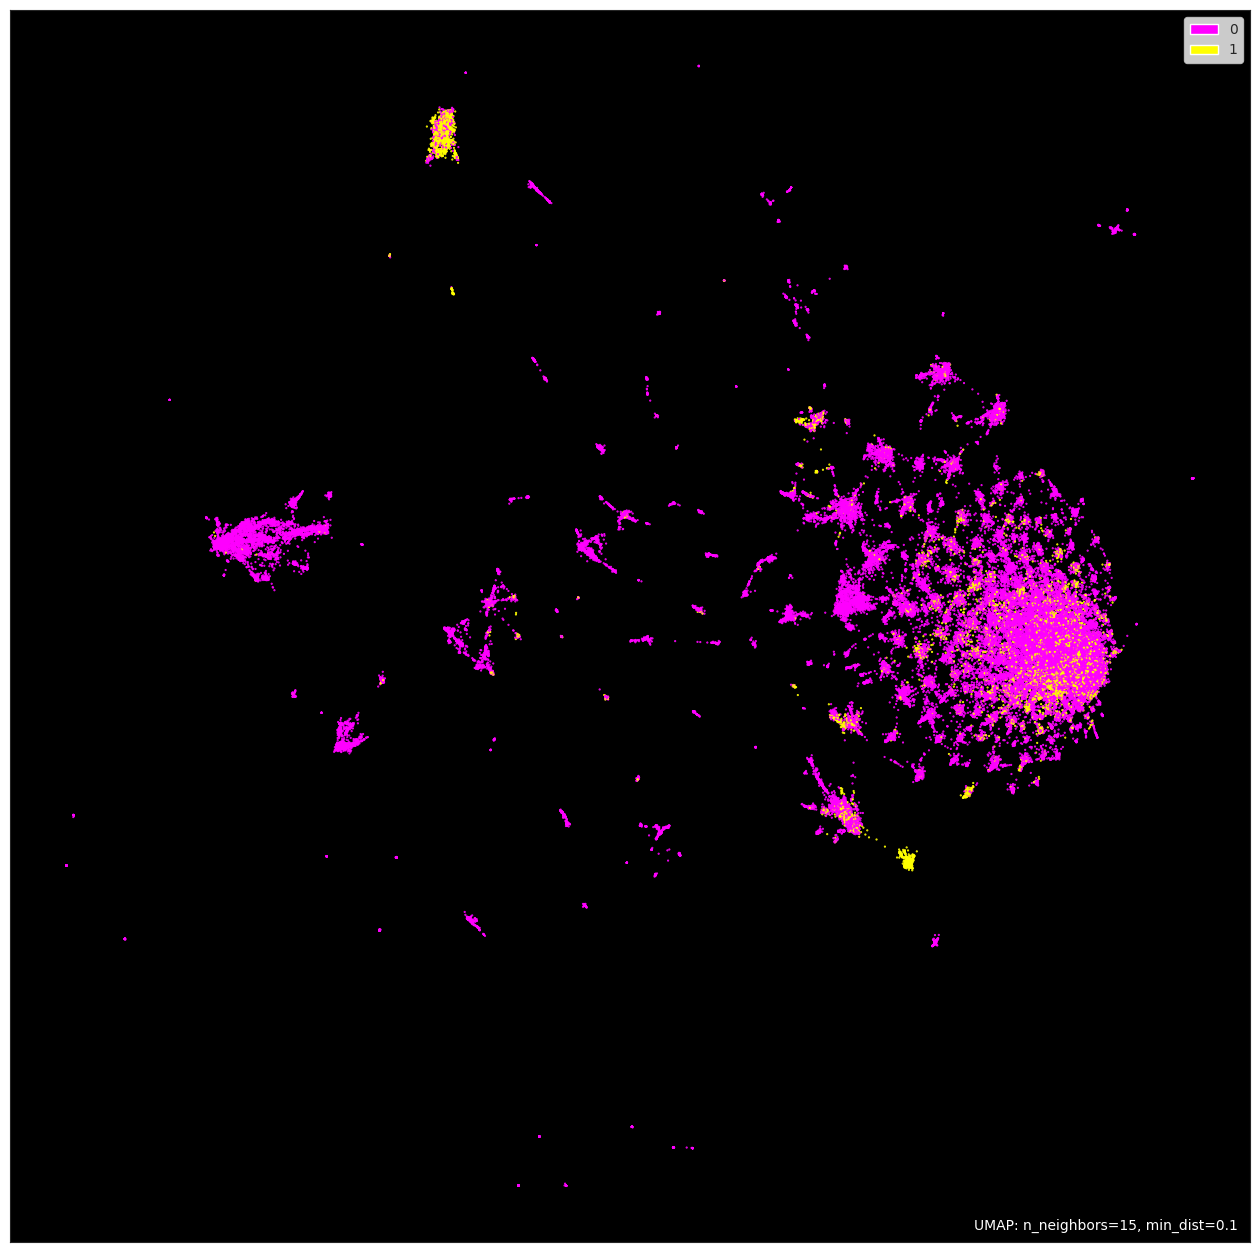

In [13]:
umap.plot.points(mapper, labels=y, background='black', color_key_cmap='spring', width=1600, height=1600)